In [1]:
import cv2
import numpy as np
import os 

from skimage.feature import peak_local_max
#from skimage.morphology import watershed
from scipy import ndimage
from scipy.signal import find_peaks

from IPython.display import clear_output
from PIL import Image

# My custom library of photoelastic tools
import sys
sys.path.append('/home/jack/workspaces/jupyter-workspace/pepe/')

from pepe.preprocess import crossMask, checkImageType, circularMask, lightCorrectionDiff, rectMask, mergeMasks
from pepe.preprocess import cannyEdgeDetection, laplacianEdgeDetection, sobelEdgeDetection, applyFilter

from pepe.analysis import gSquared
from pepe.tracking import houghCircle, circularKernelFind, convCircle
from pepe.topology import findPeaks1D, findPeaksMulti, findPeaks2D

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

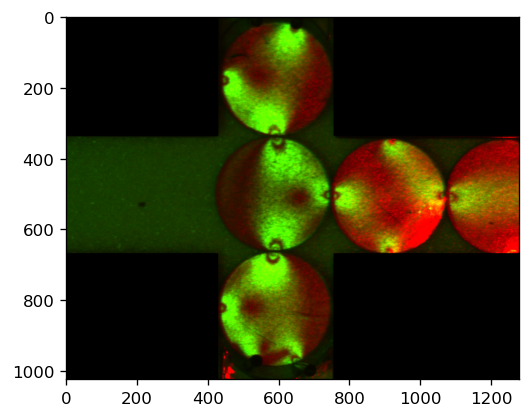

In [2]:
dataFolder = '/run/media/jack/Seagate Portable Drive/Research/SpaceJam/'

image = checkImageType(dataFolder + '2022-02-02_Wide/frame0244.bmp')
# Create a cross-shaped channel, with some parts on the ends
# For light correction, we want two separate images, one vertical and one horizontal
maskXBounds = [430, 755] # Found manually
maskYBounds = [338, 668] # Found manually
maskArr = crossMask(image.shape, xlim=np.array(maskXBounds), ylim=np.array(maskYBounds))

plt.imshow(image*maskArr)
plt.show()

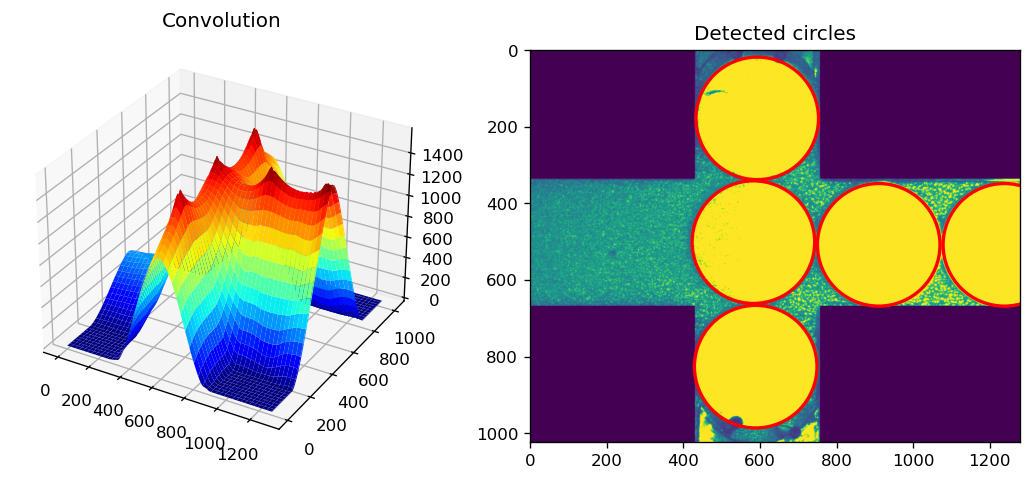

In [4]:
#%matplotlib
radius = 160
particleCenters, particleRadii = convCircle(image[:,:,0]*maskArr[:,:,0], radius,
                                            debug=True, intensitySoftmax=1.2, peakDownsample=15,
                                            offscreenParticles=False, radiusTolerance=None)

In [6]:
%timeit convCircle(image[:,:,0]*maskArr[:,:,0], radius, intensitySoftmax=2., peakDownsample=20)

545 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%timeit houghCircle(image[:,:,0]*maskArr[:,:,0], 155, radiusTolerance=20, draw=False, edgeDetection=None, accumulatorThreshold=22, cannyEdgeThreshold=90)

418 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit circularKernelFind(image[:,:,0]*maskArr[:,:,0], radius, radius, debug=False)

389 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


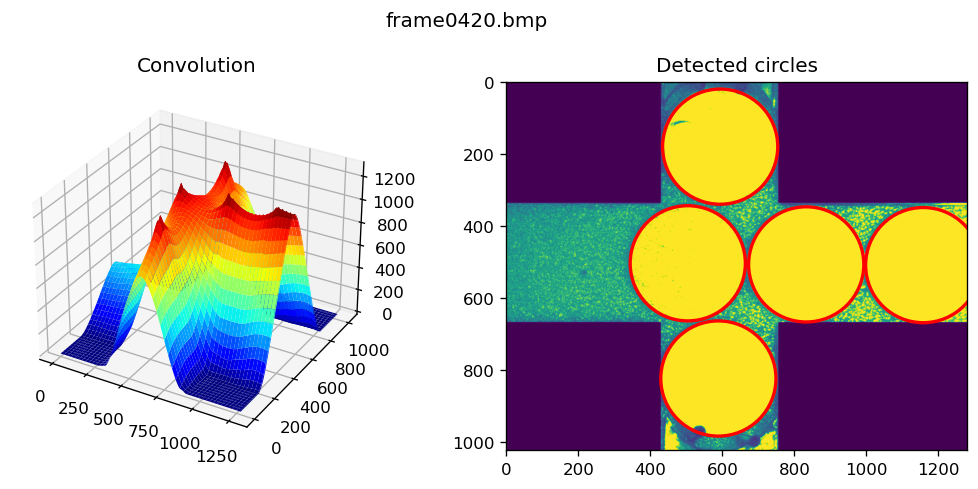

In [5]:
dataFolder = '/run/media/jack/Seagate Portable Drive/Research/SpaceJam/'
files = os.listdir(dataFolder + '2022-02-02_Wide/')
radius = 160
files = np.sort(files)
save = True

# Cut down to only the first hundred
#files = files[:100]

for i in range(len(files)):
    image = checkImageType(dataFolder + '2022-02-02_Wide/' + files[i])
    
    clear_output(wait=True)
    particleCenters, particleRadii = convCircle(image[:,:,0]*maskArr[:,:,0], radius,
                                                draw=True, intensitySoftmax=1.2, peakDownsample=20,
                                                offscreenParticles=False, radiusTolerance=None)
    fig = plt.gcf()
    fig.suptitle(files[i])
    fig.tight_layout()
    if save:
        plt.savefig('../images/convolution_test/' + files[i][:-4] + '.png')
    plt.show()
   
if save:
    imageFiles = os.listdir('../images/convolution_test/')
    imageFiles = np.sort(imageFiles)
    imageFiles = [img for img in imageFiles if img[-3:] == 'png']
    fps = 40

    images = [None for i in range(len(imageFiles))]
    for i in range(len(imageFiles)):
        images[i] = Image.open('../images/convolution_test/' + imageFiles[i])

    images[0].save('../images/convolution_test/convolution.gif', save_all=True, append_images=images[1:], duration=fps, optimize=False, loop=1)

In [7]:
imageFiles = os.listdir('../images/convolution_test/')
imageFiles = np.sort(imageFiles)
imageFiles = [img for img in imageFiles if img[-3:] == 'png']
fps = 40

images = [None for i in range(len(imageFiles))]
for i in range(len(imageFiles)):
    images[i] = Image.open('../images/convolution_test/' + imageFiles[i])
    
images[0].save('../images/convolution_test/convolution.gif', save_all=True, append_images=images[1:], duration=fps, optimize=False, loop=1)

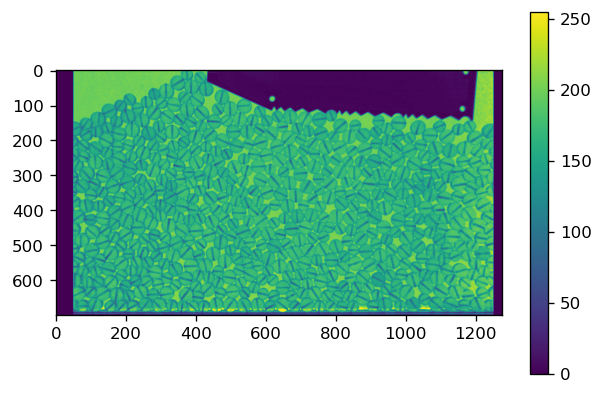

In [3]:
dataFolder = 'test_data/slider/'

image = checkImageType(dataFolder + 'N00002.bmp')

plt.imshow(image)
plt.colorbar()
plt.show()

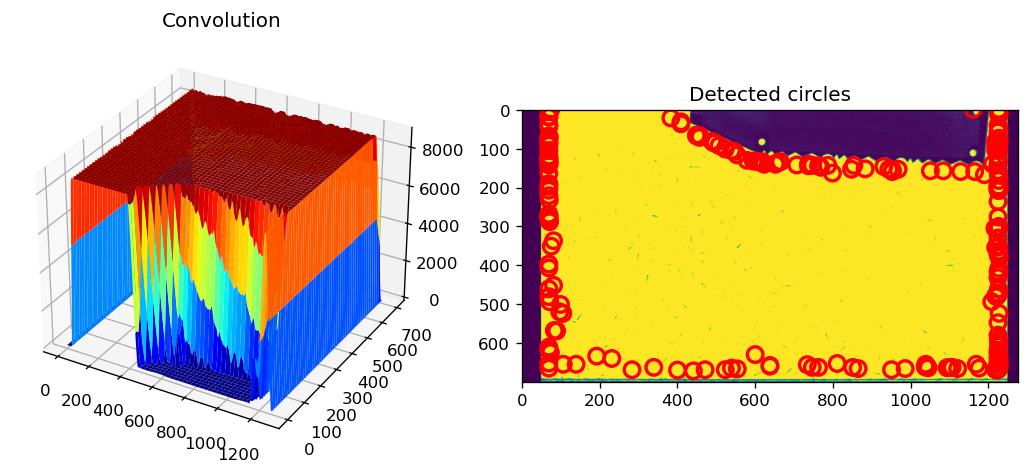

In [8]:
radius = 20
particleCenters, particleRadii = convCircle(image, radius,
                                            debug=True, intensitySoftmax=.7, peakDownsample=1,
                                            offscreenParticles=False, radiusTolerance=None, invert=True)